Je vais faire des test de l'algorithme mais pas stochastique


In [6]:
import numpy as np

def dnorm(theta,X):
    mu, sig = theta
    n = len(X)
    return -1/2*np.sum((X-mu)**2)/sig**2 - n*np.log(sig**2)/2 - n*0.5*np.log(2*np.pi)
    

def gnorm(theta,X):
    mu,sig=theta
    return [(X-mu)/sig**2 , -1/(2*sig**2) + (X-mu)**2/(2*sig**4) ]


In [7]:
np.random.seed(81)

x = np.random.normal(20,3,1000)

iterations = 10000
theta = [1,1]
theta_new = theta
vitesse = 0.05

for i in range(iterations):
    choix = np.random.choice(x)
    theta_new[0] = theta[0] + vitesse*gnorm(theta,choix)[0]
    theta_new[1] = theta[1] + vitesse*gnorm(theta,choix)[1]
    theta = theta_new

print(theta)
print(np.var(x)**0.5)

[20.092032357939274, 3.0050465750128]
3.04866630552188


Text(0.5, 0.92, "Log-vraisemblance de l'echantillon par rapport à µ et σ")

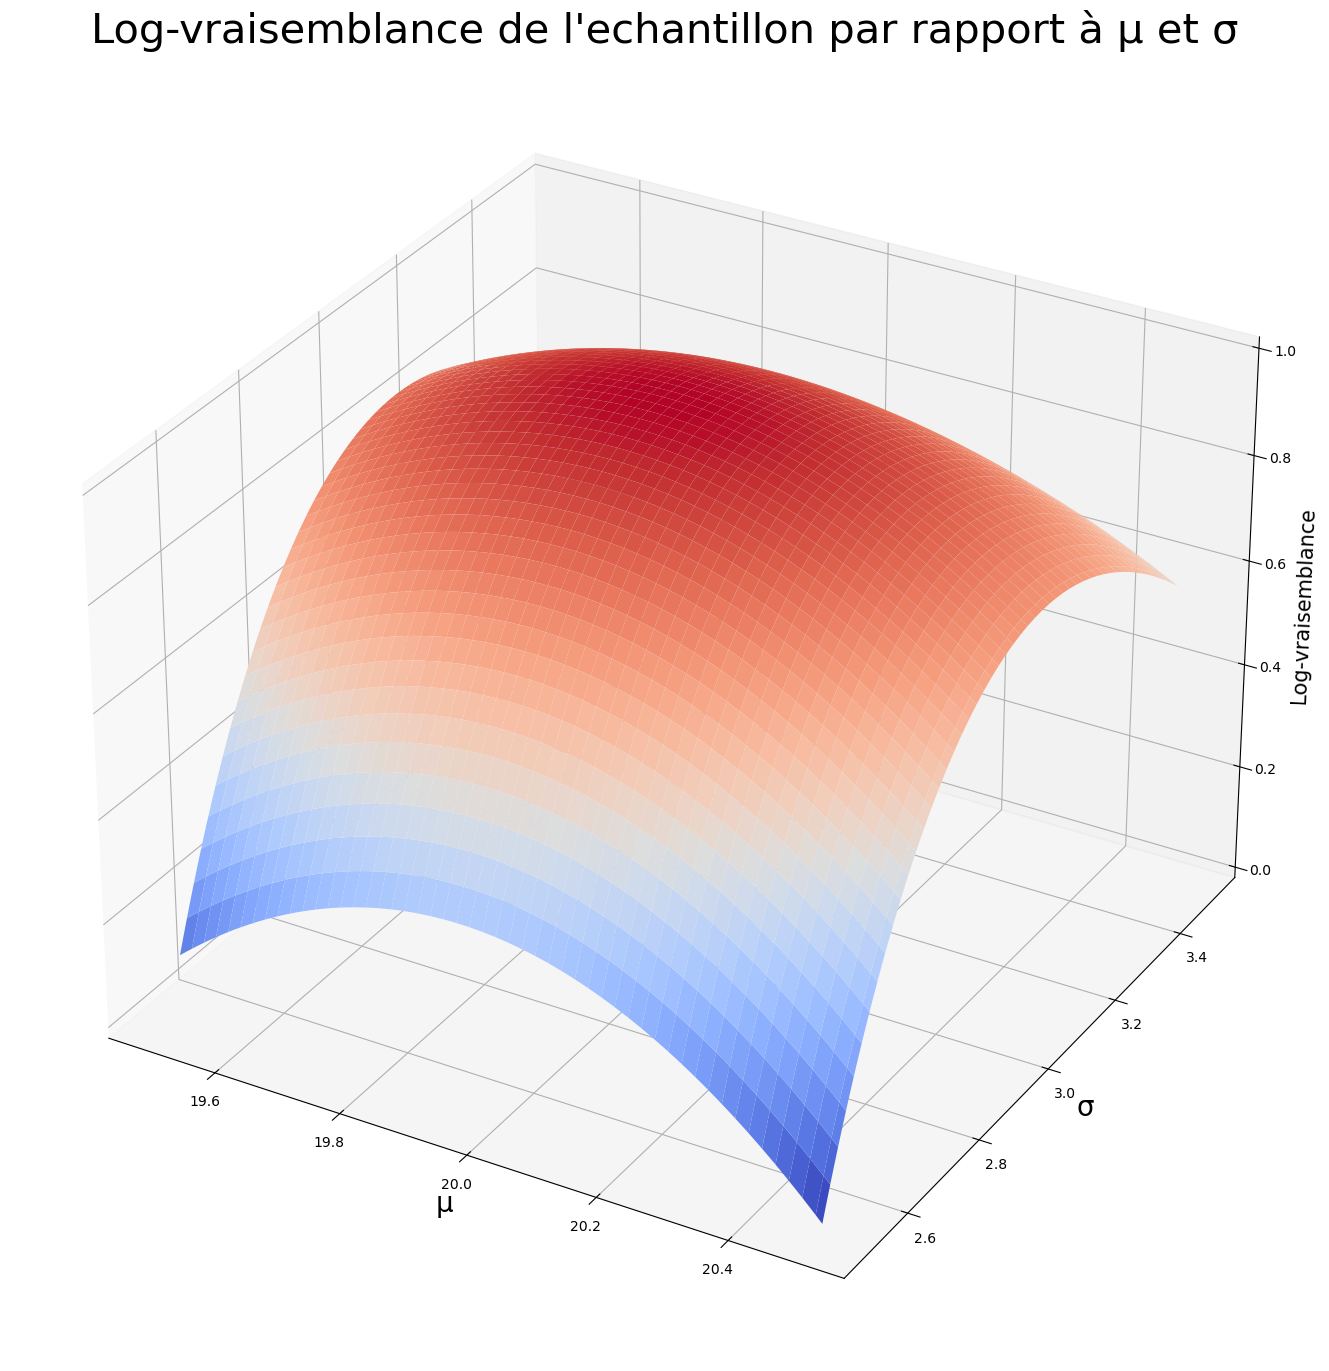

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(19.5,20.5,100)
b = np.linspace(2.5,3.5,100)
a, b = np.meshgrid(a,b)


logv = np.zeros_like(a)

for i in range(len(a)):
    for j in range(len(b)):
        logv[i,j] = dnorm([a[i,j],b[i,j]],x)

logv = (logv - np.min(logv))/(np.max(logv)-np.min(logv))

plt.figure(figsize=(17,17))
axes = plt.axes(projection="3d")
axes.plot_surface(a,b,logv, cmap="coolwarm")
plt.xlabel("µ",size = 20)
plt.ylabel("σ",size = 20)
axes.set_zlabel("Log-vraisemblance", size = 15)
plt.title("Log-vraisemblance de l'echantillon par rapport à µ et σ", size = 30)

# Importation des données Credit Scoring

## Base de données regroupant 30000 observations

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dt = pd.read_csv("scoring.csv")

defaut = dt["default.payment.next.month"]

dt=dt.drop("ID",axis=1)
dt=dt.drop("default.payment.next.month",axis=1)


dt["intercept"] = np.full(len(dt),1) #On place une colonne avec la constante

dt

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,intercept
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Normalisation des données

On remarque que dans notre base de données, l'étendue des valeurs des différentes variables sont très éloignées, ainsi il est necessaire de les normaliser afin de donner autant d'importance à chaque variables. Ceci est necessaire à la convergence de nos futurs paramètres.

In [10]:
for i in range(dt.shape[1]-1):
    dt.iloc[:,i] = (dt.iloc[:,i]-np.mean(dt.iloc[:,i]))/np.std(dt.iloc[:,i])

dt

C:\Users\boubo\AppData\Local\Temp\ipykernel_7148\2022337001.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.810161
1        0.810161
2        0.810161
3        0.810161
4       -1.234323
           ...   
29995   -1.234323
29996   -1.234323
29997   -1.234323
29998   -1.234323
29999   -1.234323
Name: SEX, Length: 30000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dt.iloc[:,i] = (dt.iloc[:,i]-np.mean(dt.iloc[:,i]))/np.std(dt.iloc[:,i])
C:\Users\boubo\AppData\Local\Temp\ipykernel_7148\2022337001.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.185828
1        0.185828
2        0.185828
3        0.185828
4        0.185828
           ...   
29995    1.451114
29996    1.451114
29997    0.185828
29998    1.451114
29999    0.185828
Name: EDUCATION, Length: 30000, 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,intercept
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,1
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,1
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,1
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,1
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


## Création de fonctions utiles
### Sigmoïde :
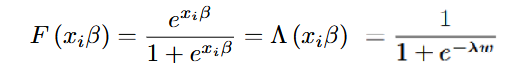                 

In [11]:
def sigmoid(valeur):
    return 1/(1+np.exp(-valeur))

### Log-vraisemblance :
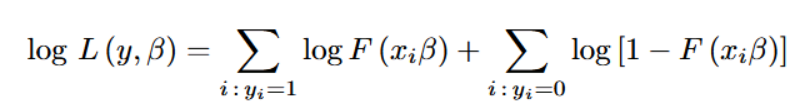

In [12]:
# Log-vraisemblance Logit
def log_likelihood(X, y, beta):
    p = sigmoid(np.dot(X,beta))  
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

### Gradient :
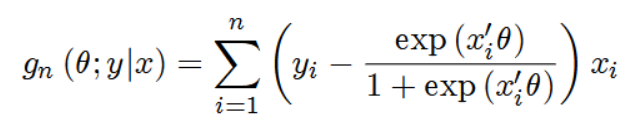

In [13]:
# Gradient individuel pour la descente de gradient stochastique
def stochastic_gradient(X, y, beta, i):
    p = sigmoid(X.loc[i].dot(beta))  # Prédiction pour l'observation i
    return X.loc[i] * (y[i]-p)  # Gradient pour l'observation i

# Gradient de l'echantillon pour la Descente de gradient et Newton Raphson
def gradient(X, y, beta):
    p = sigmoid(X.dot(beta))
    return X.T.dot(p - y)

### Hessienne :
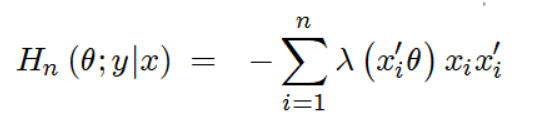

In [14]:

# Hessienne de l'echantillon pour Newton Raphson
def hessian(X, y, beta):
    p = sigmoid(X.dot(beta))
    S = np.diag(p * (1 - p)) 
    return X.T.dot(S).dot(X)

## Algorithme de la Descente de gradient Stochastique (SGD)

### Regle de passage :
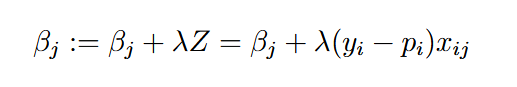

Coefficients optimisés : LIMIT_BAL   -0.151090
SEX         -0.089721
EDUCATION   -0.114776
MARRIAGE    -0.042873
AGE          0.074910
PAY_0        0.668437
PAY_2        0.128856
PAY_3        0.114967
PAY_4        0.053479
PAY_5        0.023162
PAY_6        0.025007
BILL_AMT1   -0.113801
BILL_AMT2   -0.008621
BILL_AMT3   -0.002680
BILL_AMT4    0.016937
BILL_AMT5    0.052009
BILL_AMT6    0.036033
PAY_AMT1    -0.160585
PAY_AMT2    -0.089330
PAY_AMT3    -0.129605
PAY_AMT4    -0.089557
PAY_AMT5    -0.078742
PAY_AMT6    -0.088638
intercept   -1.420668
Name: 28085, dtype: float64


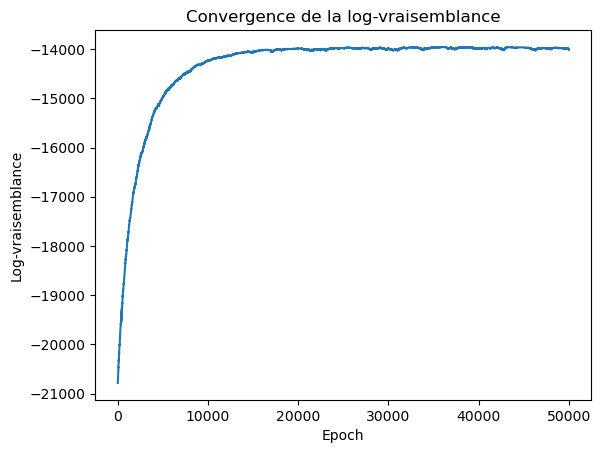

In [19]:
# Descente de gradient stochastique pour la régression logistique
def stochastic_gradient_descent_logistic(X, y, epoch=1000, vitesse_apprentissage=0.01):
    # Initialiser les paramètres
    n, m = X.shape
    beta = np.zeros(m)  # Initialisation des paramètres à zéro
    log_likelihoods = []  # Stockage de la log-vraisemblance à chaque eppoch

    for iteration in range(epoch):

        i = np.random.randint(len(X))
        # Calculer le gradient stochastique pour l'observation i
        grad = stochastic_gradient(X, y, beta, i)
            
        # Mise à jour des paramètres
        beta += vitesse_apprentissage * grad
        # Calcule de la Log-Vraisemblance
        log_likelihoods.append(log_likelihood(X, y, beta))
    return beta, log_likelihoods

# Application
beta1, log_likelihoods = stochastic_gradient_descent_logistic(dt, defaut, epoch=50000, vitesse_apprentissage=0.001)

# Afficher les résultats
print("Coefficients optimisés :", beta1)

# Traçage de la log-vraisemblance
plt.plot(log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-vraisemblance')
plt.title('Convergence de la log-vraisemblance')
plt.show()

# Algorithme de la Descente de gradient classique

Coefficients optimisés : LIMIT_BAL   -0.104062
SEX         -0.052570
EDUCATION   -0.081206
MARRIAGE    -0.080599
AGE          0.068936
PAY_0        0.650676
PAY_2        0.097522
PAY_3        0.090328
PAY_4        0.029335
PAY_5        0.036606
PAY_6        0.010164
BILL_AMT1   -0.176049
BILL_AMT2   -0.023714
BILL_AMT3    0.008620
BILL_AMT4    0.017980
BILL_AMT5    0.037528
BILL_AMT6    0.042300
PAY_AMT1    -0.176012
PAY_AMT2    -0.187042
PAY_AMT3    -0.064506
PAY_AMT4    -0.070697
PAY_AMT5    -0.057435
PAY_AMT6    -0.040111
intercept   -1.461192
dtype: float64


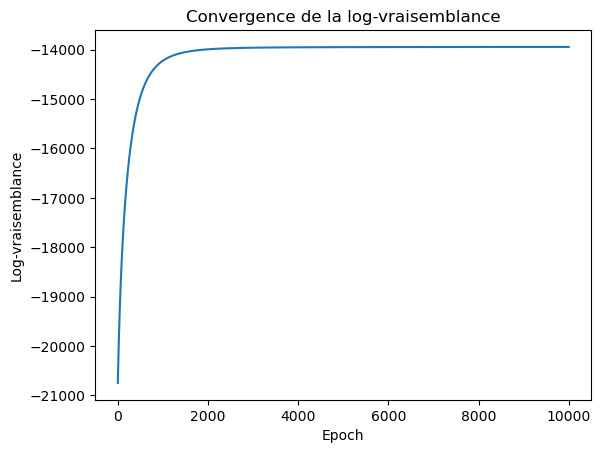

In [20]:
# Fonction de la descente de gradient classique
def gradient_descent_logistic(X, y, vitesse_apprentissage=0.01, epoch=1000):
    # Initialiser les paramètres
    n, m = X.shape
    beta = np.zeros(m) 

    log_likelihoods = []
    
    # Descente de gradient
    for _ in range(epoch):
        eval_gradient = (1 / n) * gradient(X,y,beta)
        
        # Mise à jour des paramètres
        beta -= vitesse_apprentissage * eval_gradient
        
        # Calculer et stocker la log-vraisemblance
        log_likelihoods.append(log_likelihood(X, y, beta))
    
    return beta, log_likelihoods

# Application
beta2, log_likelihoods = gradient_descent_logistic(dt, defaut, vitesse_apprentissage=0.01, epoch=10000)

# Affichage des résultats
print("Coefficients optimisés :", beta2)

# Traçage de la log-vraisemblance
plt.plot(log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-vraisemblance')
plt.title('Convergence de la log-vraisemblance')
plt.show()


# Algorithme Newton-Raphson

### Regle de passage :
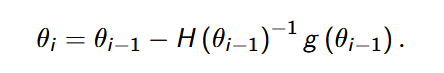

Coefficients optimisés : [-0.09890296 -0.05314444 -0.0802848  -0.0805674   0.06839281  0.64887994
  0.09915215  0.08634176  0.02792574  0.03854232  0.00924346 -0.40442837
  0.16770513  0.09467116 -0.01171652  0.03741806  0.02345199 -0.22577926
 -0.2215509  -0.04827258 -0.06303141 -0.05058702 -0.03669309 -1.46565367]


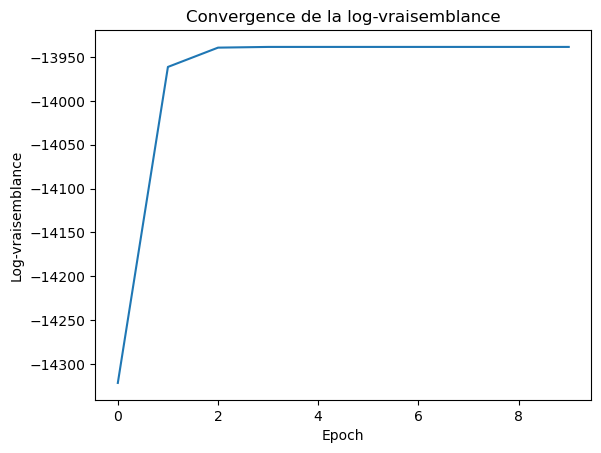

In [17]:
# Algorithme de Newton-Raphson pour la régression logistique
def newton_raphson_logistic(X, y, epoch=100):
    # Initialiser les paramètres
    n, m = X.shape
    beta = np.zeros(m)
    
    log_likelihoods = []  # Pour stocker la log-vraisemblance à chaque itération
    
    for iteration in range(epoch):
        # Calcule du gradient et de la Hessienne
        grad = gradient(X, y, beta)
        H = hessian(X, y, beta)
        
        # Mise à jour des paramètres selon la méthode de Newton-Raphson
        beta_new = beta - np.linalg.inv(H).dot(grad)
        
        # Calculer la log-vraisemblance
        log_likelihoods.append(log_likelihood(X, y, beta_new))
        
        # Mise à jour des paramètres pour la future itération
        beta = beta_new
    
    return beta, log_likelihoods

# Application
beta3, log_likelihoods = newton_raphson_logistic(dt, defaut, epoch=10)

# Affichage des résultats
print("Coefficients optimisés :", beta3)

# Traçage de la log-vraisemblance
plt.plot(log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-vraisemblance')
plt.title('Convergence de la log-vraisemblance')
plt.show()


In [18]:
resume = pd.concat([beta1,beta2],axis=1)
resume.rename(columns={19495: 'SGD'}, inplace=True)
resume.rename(columns={0: 'GD'}, inplace=True)
resume["Newton-raphson"] = beta3
resume

,9162,GD,Newton-raphson
LIMIT_BAL,-0.069280,-0.104062,-0.098903
SEX,-0.054293,-0.052570,-0.053144
EDUCATION,-0.098785,-0.081206,-0.080285
MARRIAGE,-0.121038,-0.080599,-0.080567
AGE,0.071142,0.068936,0.068393
PAY_0,0.640705,0.650676,0.648880
PAY_2,0.100024,0.097522,0.099152
PAY_3,0.117552,0.090328,0.086342
PAY_4,0.065228,0.029335,0.027926
PAY_5,0.062348,0.036606,0.038542
